In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../../DataSets/FastFoodChainsUSA.csv')

In [12]:
df.head()

,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,4462,1309,2293,1116,3409,40
1,Baskin-Robbins,686,296,2317,0,2317,102
2,Bojangles,1485,1924,496,277,773,15
3,Burger King,10033,1470,7054,51,7105,24
4,Carl’s Jr.,1560,1400,1011,47,1058,-21


In [13]:
df.shape

(50, 7)

In [14]:
df.duplicated().any()

False

In [15]:
df.isna().any()

Fast-Food Chains                                    False
U.S. Systemwide Sales (Millions - U.S Dollars)      False
Average Sales per Unit (Thousands - U.S Dollars)    False
Franchised Stores                                   False
Company Stores                                      False
2021 Total Units                                    False
Total Change in Units from 2020                     False
dtype: bool

In [16]:
df.describe()

,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
count,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000
mean,4965.060000,1857.660000,2663.96000,503.50000,3167.400000,29.700000
std,7531.439444,1163.266418,3801.49754,1332.16928,4124.173105,173.769875
min,615.000000,296.000000,0.00000,0.00000,243.000000,-1043.000000
25%,935.250000,1084.000000,478.00000,33.75000,788.250000,-4.250000
50%,2289.500000,1510.500000,1115.50000,176.00000,1634.000000,24.000000
75%,5400.000000,2129.750000,3103.00000,396.00000,3516.250000,91.000000
max,45960.000000,6100.000000,21147.00000,8953.00000,21147.000000,246.000000


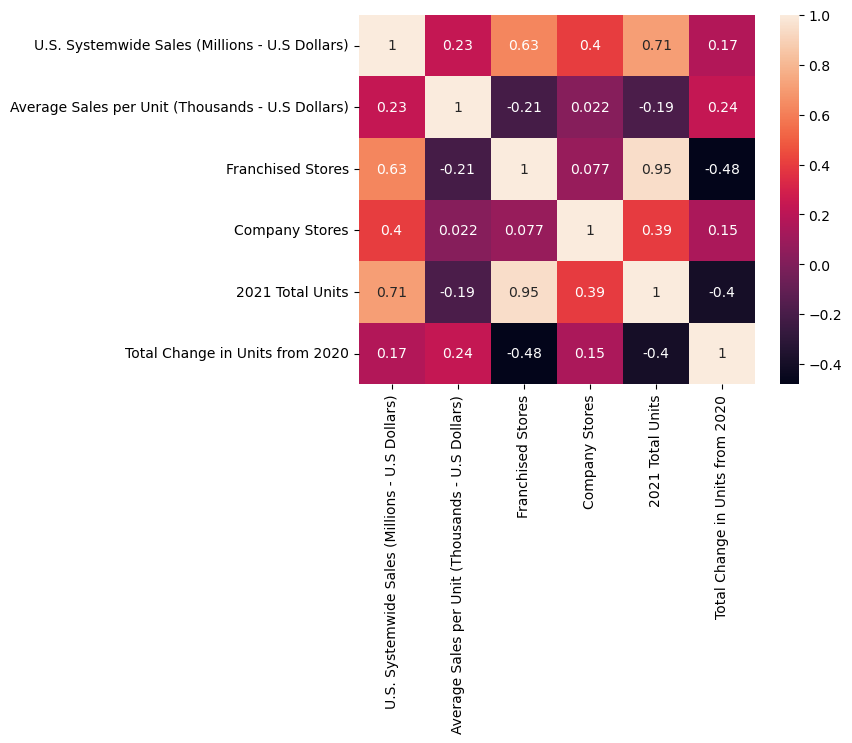

In [33]:
corr = df.corr(numeric_only = True)
sns.heatmap(data=corr, annot=True)
plt.show()

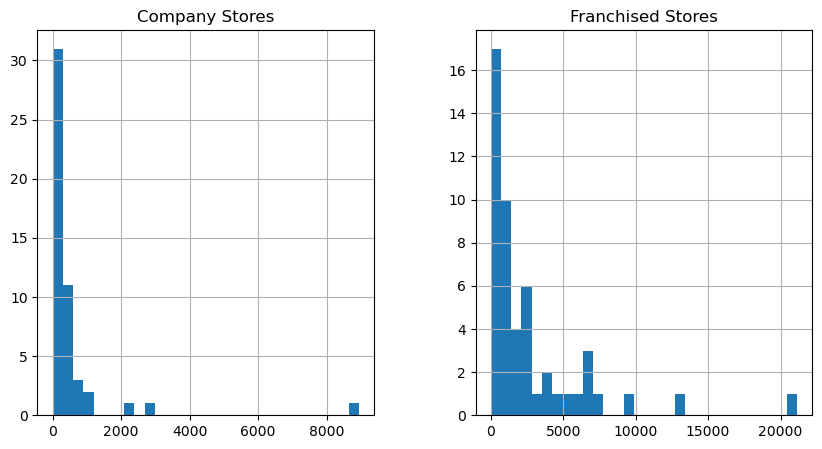

In [30]:
df[['Company Stores','Franchised Stores']].hist(bins=30, figsize=(10,5))
plt.show()

In [27]:
df[df['Company Stores']>500].head(15)

,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,4462,1309,2293,1116,3409,40
7,Chipotle,7547,2641,0,2966,2966,198
25,Little Caesars,4185,1000,3601,580,4181,-28
28,McDonald’s,45960,3420,12775,663,13438,244
30,Panda Express,4452,2173,147,2187,2334,150
31,Panera Bread,5650,2700,1130,950,2080,-25
32,Papa Johns,3486,1147,2564,600,3164,30
37,Raising Cane’s,2377,4893,23,544,567,58
40,Starbucks,24300,1200,6497,8953,15450,113
46,Whataburger,3089,3640,131,742,873,29


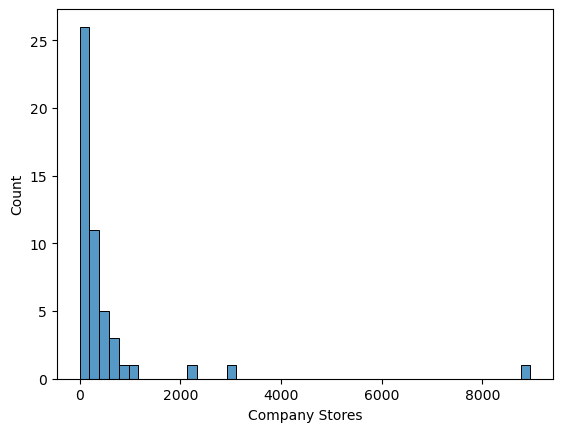

In [35]:
sns.histplot(x='Company Stores',data=df)
plt.show()

In [36]:
#Rename the columns by changing " " to "_"
df.rename(columns={'Fast-Food Chains':'Fast_Food_Chains',
                   'U.S. Systemwide Sales (Millions - U.S Dollars)':'US_Systemwide_Sales_Millions_USD',
                   'Average Sales per Unit (Thousands - U.S Dollars)':'Average_Sales_per_Unit_Thousands_USD',
                   'Franchised Stores':'Franchised_Stores', 'Company Stores':'Company_Stores',
                   '2021 Total Units':'Total_Units_2021',
                   'Total Change in Units from 2020':'Total_Change_in_Units_from_2020'},
          inplace=True)

# Franchising and U.S. Systemwide Sales

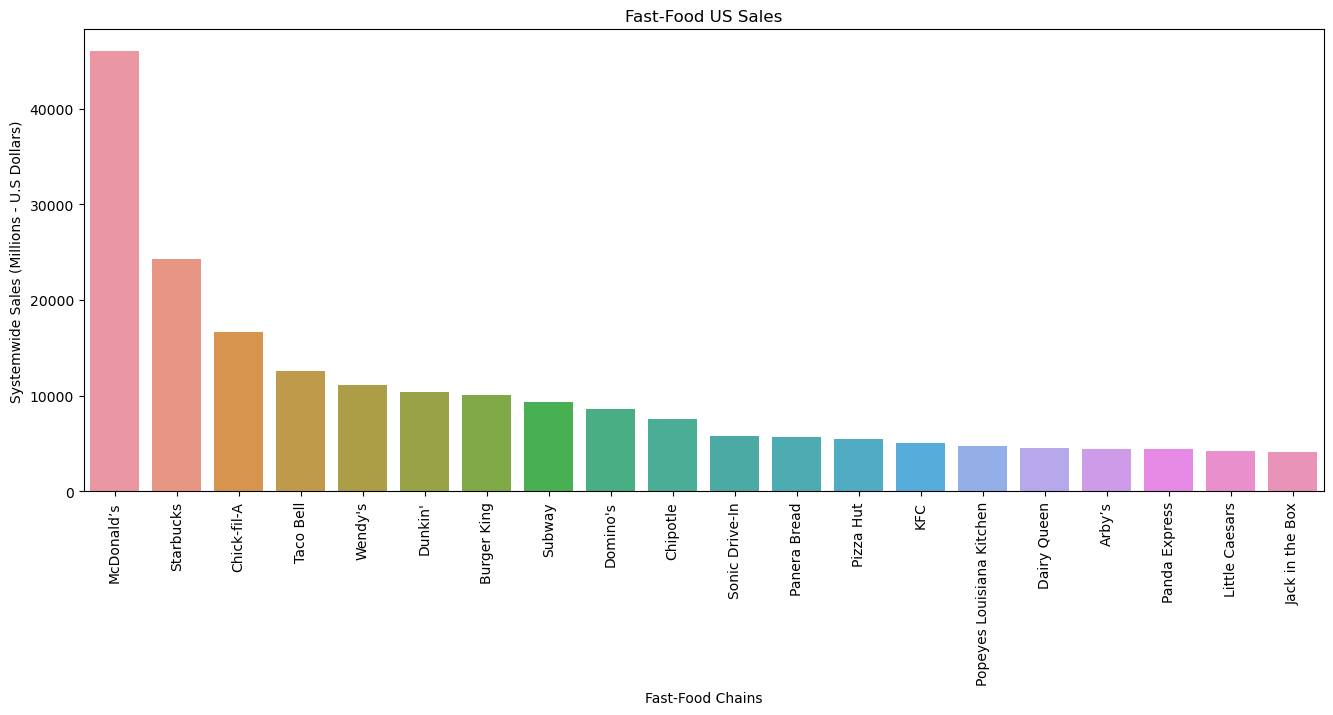

In [44]:
top_sales = df.sort_values(by='US_Systemwide_Sales_Millions_USD', ascending=False)
plt.figure(figsize=(16, 6))  # Change the width and height as needed
sns.barplot(data=top_sales[:20], x='Fast_Food_Chains', y='US_Systemwide_Sales_Millions_USD')
plt.title('Fast-Food US Sales')
plt.xlabel('Fast-Food Chains')
plt.xticks(rotation=90)
plt.ylabel('Systemwide Sales (Millions - U.S Dollars)')
plt.show()

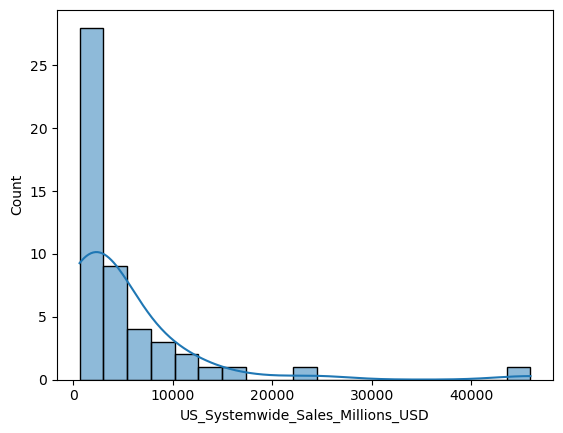

In [49]:
# Distribution
sns.histplot(df["US_Systemwide_Sales_Millions_USD"], kde=True)
plt.show()

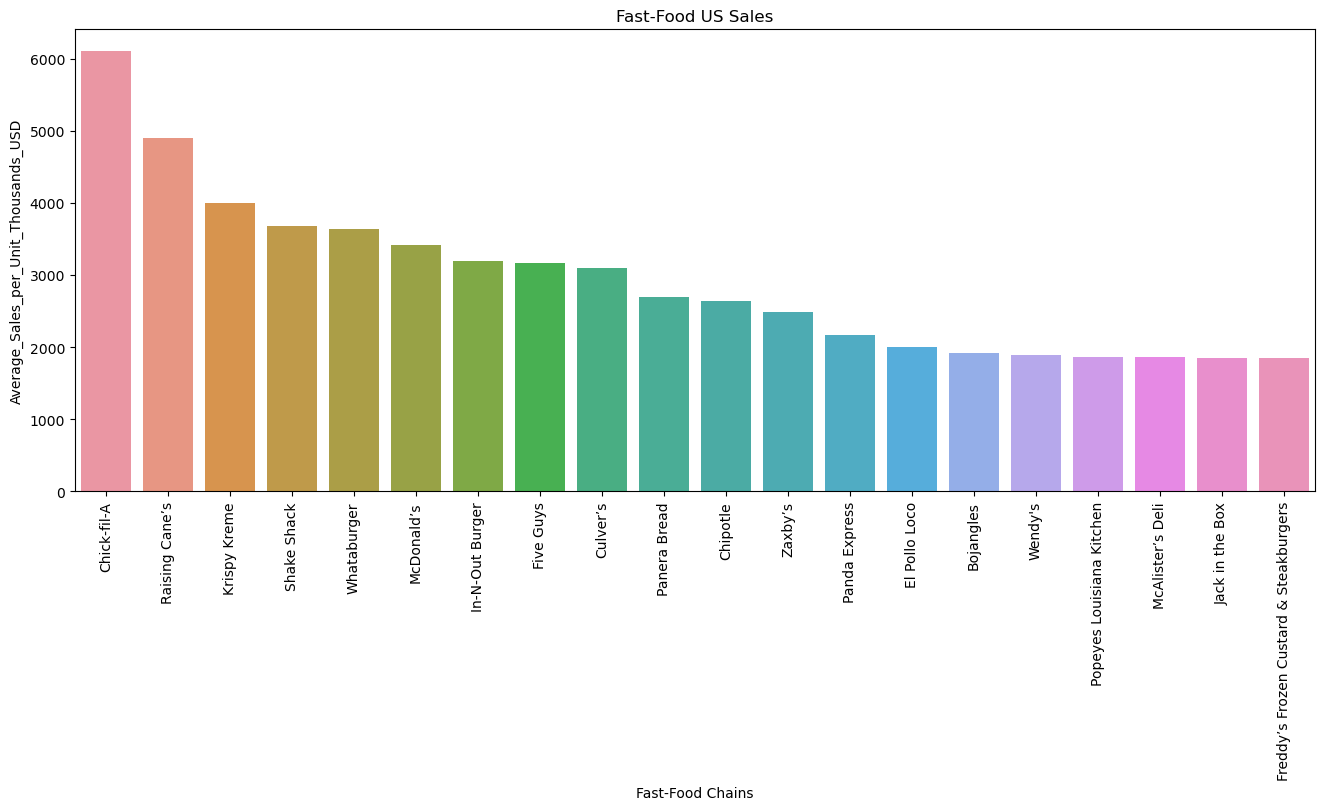

In [47]:
avg_sales = df.sort_values("Average_Sales_per_Unit_Thousands_USD", ascending=False)
plt.figure(figsize=(16, 6))  # Change the width and height as needed
sns.barplot(data=avg_sales[:20], x='Fast_Food_Chains', y='Average_Sales_per_Unit_Thousands_USD')
plt.title('Fast-Food US Sales')
plt.xlabel('Fast-Food Chains')
plt.xticks(rotation=90)
plt.ylabel('Average_Sales_per_Unit_Thousands_USD')
plt.show()

In [50]:
# Use a lambda expression to create col_2
df["Open_Closed_Status_2021"] = df['Total_Change_in_Units_from_2020'].apply(lambda x: 1 if x > 0 else 0)

In [57]:
df["Open_Closed_Status_2021"].value_counts()

Open_Closed_Status_2021
1    37
0    13
Name: count, dtype: int64

In [58]:
df_closed=df[df["Open_Closed_Status_2021"]==0]
df_opened=df[df["Open_Closed_Status_2021"]==1]

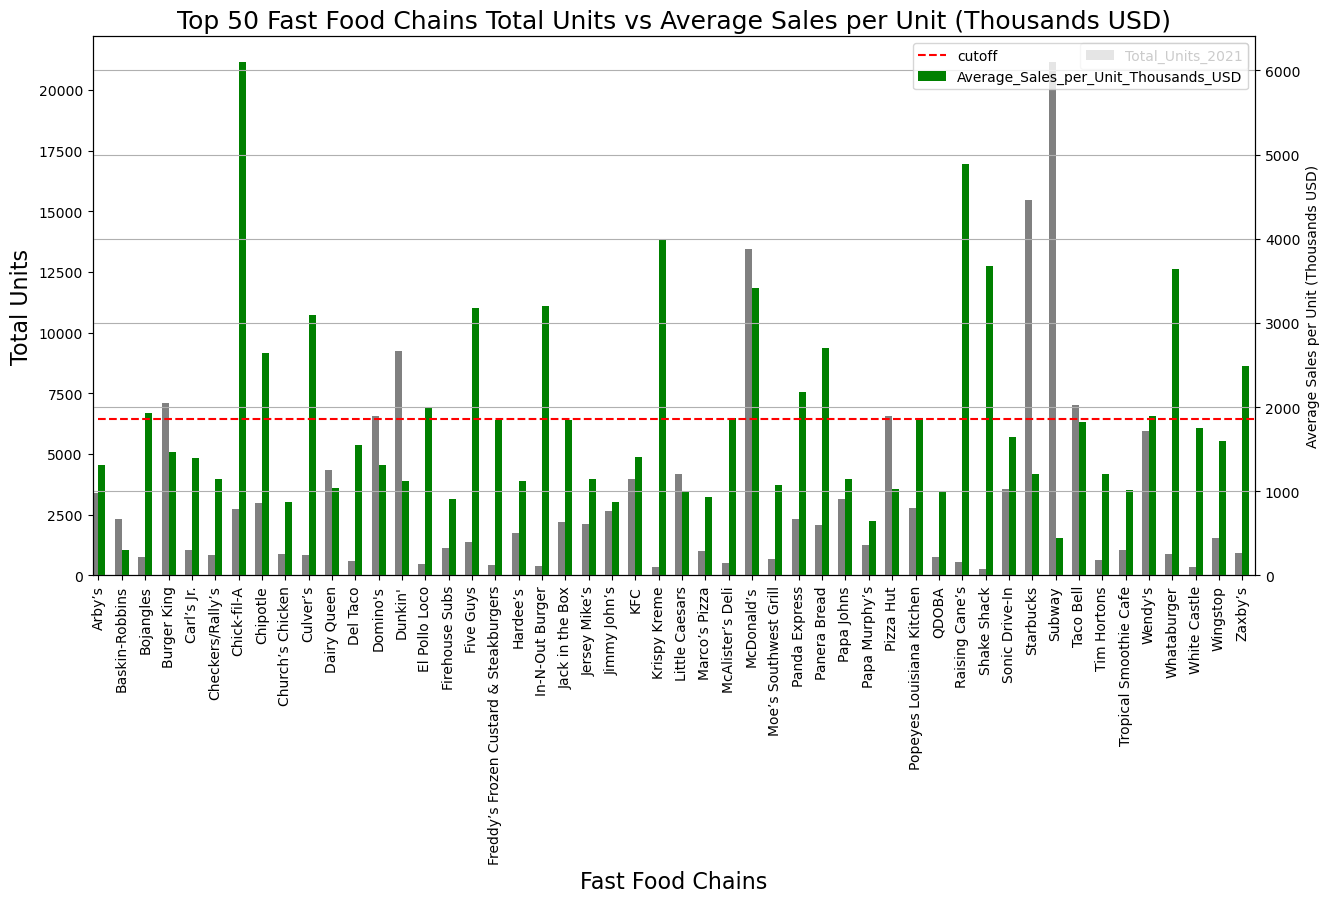

In [59]:
df_ffc = df.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc.Total_Units_2021.plot(kind='bar',color='grey',ax=ax, width=width, position=1)
df_ffc.Average_Sales_per_Unit_Thousands_USD.plot(kind='bar',color='green', ax=ax2, width=width, position=0)

plt.hlines(y=1857.66, xmin=0, xmax=6500, colors='r', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('Top 50 Fast Food Chains Total Units vs Average Sales per Unit (Thousands USD)', fontsize=18)
ax.set_ylabel('Total Units', fontsize=16)
ax2.set_ylabel('Average Sales per Unit (Thousands USD)')
ax.set_xlabel('Fast Food Chains', fontsize=16)

ax.legend()
ax2.legend()

plt.show()

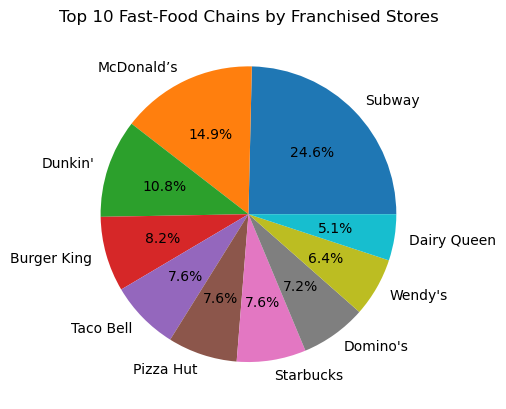

In [60]:
# Sort df by Franchised Store and Select the top 10 chains
top_franchised_stores = df.sort_values('Franchised_Stores', ascending=False).head(10)

# Create a pie chart
plt.pie(top_franchised_stores['Franchised_Stores'], labels=top_franchised_stores['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains by Franchised Stores')
plt.show()

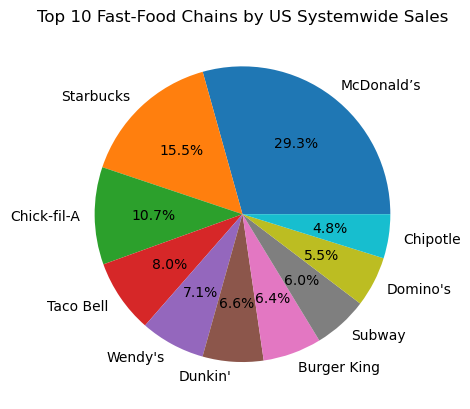

In [64]:
plt.pie(top_sales['US_Systemwide_Sales_Millions_USD'][:10], labels=top_sales['Fast_Food_Chains'][:10], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains by US Systemwide Sales')
plt.show()

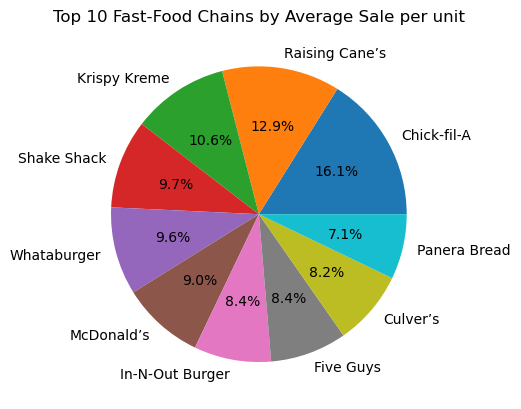

In [63]:
plt.pie(avg_sales['Average_Sales_per_Unit_Thousands_USD'][:10], labels=avg_sales['Fast_Food_Chains'][:10], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains by Average Sale per unit')
plt.show()